## Introductory Overview

This notebook serves as the collection and summary of the data shown in the other notebooks to produce a conclusive result of which neighborhood is the best within the context of all three metrics we examined. A brief refresher of the final results of each study was provided, with the notebooks catered to individual studies going more in-depth on each. To reach our conclusion, similarly to how we reached our conclusion within the food facility inspection study, we averaged the final scores each neighborhood received in the three different studies. We left out any neighborhood that was not included in all three studies, as it could potentially be bad enough in the field it wasn't studied in that it would have ruined its otherwise good score.

* NOTE: Make sure to upload the files 'top_15.csv', 'Fatal_Data_counts.csv', and 'arrest.csv' to the same directory as this notebook prior to running.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
food_rank = pd.read_csv("top_15.csv")
food_rank

,NEIGHBORHOOD,total_rank
0,Larimer,24.0
1,North Shore,32.0
2,Point Breeze,34.0
3,Hazelwood,35.0
4,Banksville,36.0
5,Perry South,36.0
6,Garfield,36.0
7,Bedford Dwellings,37.0
8,Summer Hill,37.0
9,Northview Heights,37.0


In [3]:
fatal_rank = pd.read_csv("Fatal_Data_counts.csv")
fatal_rank

,NEIGHBORHOOD,count
0,Banksville,15
1,Hazelwood,22
2,Sheraden,36
3,Point Breeze,40
4,Stanton Heights,50
5,Brighton Heights,52
6,Bloomfield,69
7,Middle Hill,69
8,Larimer,71
9,Garfield,81


In [4]:
arrest_rank = pd.read_csv("arrest.csv")
arrest_rank

,INCIDENTNEIGHBORHOOD,count
0,Mt. Oliver Neighborhood,2
1,Troy Hill-Herrs Island,6
2,Mt. Oliver Boro,18
3,Central Northside,23
4,Ridgemont,37
5,Regent Square,37
6,New Homestead,39
7,Swisshelm Park,43
8,Chartiers City,46
9,East Carnegie,48


In [22]:
df1 = food_rank
df2 = fatal_rank
df3 = arrest_rank
df3.rename(columns={'INCIDENTNEIGHBORHOOD': 'NEIGHBORHOOD'}, inplace=True)

df1['Rank1'] = df1['NEIGHBORHOOD'].rank(method='first')
df2['Rank2'] = df2['NEIGHBORHOOD'].rank(method='first')
df3['Rank3'] = df3['NEIGHBORHOOD'].rank(method='first')
df1.set_index('NEIGHBORHOOD', inplace=True)
df2.set_index('NEIGHBORHOOD', inplace=True)
df3.set_index('NEIGHBORHOOD', inplace=True)
combined_df = df1[['Rank1']].merge(df2[['Rank2']], on='NEIGHBORHOOD', how='outer')
combined_df = combined_df.merge(df3[['Rank3']], on='NEIGHBORHOOD', how='outer')
combined_df.fillna(20, inplace=True)
combined_df['Total Rank'] = combined_df.sum(axis=1)
combined_df = combined_df.sort_values(by='Total Rank')
print(combined_df['Total Rank'])

NEIGHBORHOOD
Banksville                     22.0
Garfield                       31.0
Mt. Oliver Boro                33.0
Hazelwood                      34.0
Larimer                        36.0
Central Northside              41.0
Chartiers City                 42.0
Bloomfield                     42.0
Bedford Dwellings              42.0
East Carnegie                  43.0
Bon Air                        43.0
Brighton Heights               43.0
East Allegheny                 44.0
Central Oakland                44.0
Point Breeze                   45.0
Mt. Oliver Neighborhood        45.0
Elliott                        45.0
New Homestead                  46.0
Golden Triangle/Civic Arena    46.0
Summer Hill                    47.0
Oakwood                        47.0
Outside County                 48.0
Marshall-Shadeland             49.0
Outside State                  49.0
North Shore                    50.0
Middle Hill                    50.0
Regent Square                  50.0
Ridgemont      

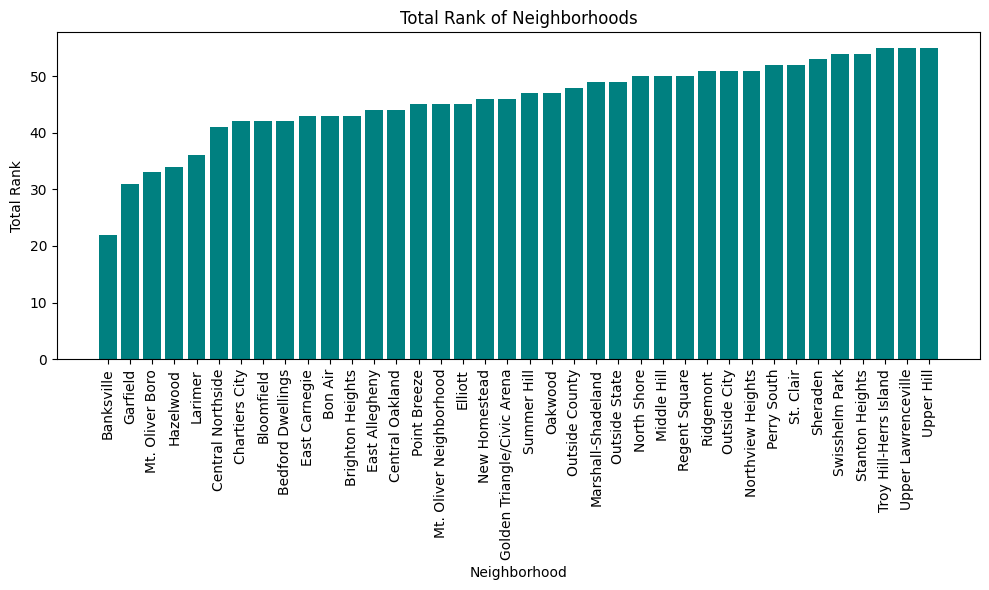

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(combined_df.index, combined_df['Total Rank'], color='teal')
plt.xlabel('Neighborhood')  # X-axis label
plt.ylabel('Total Rank')  # Y-axis label
plt.title('Total Rank of Neighborhoods')  # Chart title
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Results and Conclusion

After averaging the metrics we examined, the results show that the best neighborhood in the context of our studies is Banksville. While this is not an unexpected or flawed result, with Banksville placing 1st in one metric, 5th in another, and generally being considered one of the better neighborhoods to live in in Pittsburgh, our study was not without flaw. After all, the neighborhood that came in 2nd place is Garfield, which is widely understood to be far from the best neighborhood in the city. Thus, while this study highlighted data surrounding important metrics to consider when judging neighborhoods, it is not a conclusive result that proves anything concretely. 

I do not believe that there are any three metrics that could be chosen to accurately portray the best neighborhoods in a city. There are so many factors that go into such a topic that we would need to look at countless studies to reach a firm conclusion based on data alone and not personal opinions. However, there is still something positive to be gained from examining the results of simply a few of these studies. It shows just how much goes into answering the question of which neighborhood in a city is the best and that even neighborhoods generally not ranked amongst the best can excel in certain aspects. In conclusion, the somewhat flawed results do not invalidate this study but rather gives it even more meaning, demonstrating how the best neighborhoods excel in nearly everything and the worst neighborhoods can still excel in some metrics, and we can come away from this study with satisfying, meaningful results.